문제 1


In [36]:
import numpy as np
import random


X = [[18, 5],
     [20, 9],
     [20, 14],
     [20, 17],
     [5, 15],
     [9, 15],
     [6, 20]]

X = np.array([np.array(_x, dtype=np.float32) for _x in X], dtype=np.float32)
k = 3

# Z = X[np.random.choice(len(X), k, replace=False)]
Z = X[[1,2,6]]

C = np.array([np.array([0]*k) for _ in range(len(X))])


while True:
    new_C = np.array([np.array([0]*k) for _ in range(len(X))])
    for i, x_i in enumerate(X):
        dist = [np.linalg.norm(x_i - z_j) for z_j in Z]
        min_dist = min(dist)
        min_index = dist.index(min_dist)
        new_C[i][min_index] = 1
    if np.array_equal(C, new_C):
        break
    C = new_C
    for i in range(k):
        indecies = np.where(C[:, i] == 1)[0]
        Z[i] = np.mean(X[indecies], axis=0)


print(Z)
print(C)

[[19.         7.       ]
 [20.        15.5      ]
 [ 6.6666665 16.666666 ]]
[[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [47]:
%%time


def k_means(X, k, Z):
    C = np.array([np.array([0]*k) for _ in range(len(X))])

    while True:
        new_C = np.array([np.array([0]*k) for _ in range(len(X))])
        for i, x_i in enumerate(X):
            dist = [np.linalg.norm(x_i - z_j) for z_j in Z]
            min_dist = min(dist)
            min_index = dist.index(min_dist)
            new_C[i][min_index] = 1
        if np.array_equal(C, new_C):
            break
        C = new_C
        for i in range(k):
            indecies = np.where(C[:, i] == 1)[0]
            Z[i] = np.mean(X[indecies], axis=0)

    return C, Z


def J(Z, A, X):
    n = len(A)
    k = len(A[0])
    total = 0

    for i in range(n):
        for j in range(k):
            total += A[i][j] * np.linalg.norm(Z[j] - X[i])

    return total

X = [[18, 5],
     [20, 9],
     [20, 14],
     [20, 17],
     [5, 15],
     [9, 15],
     [6, 20]]

X = np.array([np.array(_x, dtype=np.float32) for _x in X], dtype=np.float32)
k = 3
t = 10
j = float('inf')
C = np.array([np.array([0]*k) for _ in range(len(X))])
old_Z = X[[1,2,6]]

for i in range(t):
    Z = X[np.random.choice(len(X), k, replace=False)]
    new_C, new_Z = k_means(X, k, Z)
    new_j = J(Z, C, X)
    if new_j < j:
        j = new_j
        C = new_C
        old_Z = new_Z

print(C)
print(j)
print(old_Z)

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]]
0.0
[[20.        13.333333 ]
 [18.         5.       ]
 [ 6.6666665 16.666666 ]]
CPU times: user 14.9 ms, sys: 0 ns, total: 14.9 ms
Wall time: 20.1 ms


두번째 결과와 유사하게 나옴

문제 2

In [50]:
%%time


def k_medoids(X, k, Z):
    C = np.array([np.array([0]*k) for _ in range(len(X))])

    while True:
        new_C = np.array([np.array([0]*k) for _ in range(len(X))])
        for i, x_i in enumerate(X):
            dist = [np.linalg.norm(x_i - z_j) for z_j in Z]
            min_dist = min(dist)
            min_index = dist.index(min_dist)
            new_C[i][min_index] = 1
        if np.array_equal(C, new_C):
            break
        C = new_C
        for i in range(k):
            indecies = np.where(C[:, i] == 1)[0]
            # Z[i] = np.mean(X[indecies], axis=0) # medoids는 평균이 아닌 실제 데이터 포인트를 사용
            # medoid를 선택하는 부분
            min_dist_sum = float('inf')
            new_medoid = None
            for x_j in X[indecies]:
                dist_sum = np.sum([np.linalg.norm(x_j - x_l) for x_l in X[indecies]])
                if dist_sum < min_dist_sum:
                    min_dist_sum = dist_sum
                    new_medoid = x_j
            Z[i] = new_medoid

    return C, Z


X = [[18, 5],
     [20, 9],
     [20, 14],
     [20, 17],
     [5, 15],
     [9, 15],
     [6, 20]]

X = np.array([np.array(_x, dtype=np.float32) for _x in X], dtype=np.float32)
k = 3
t = 10
j = float('inf')
C = np.array([np.array([0]*k) for _ in range(len(X))])
old_Z = X[[1,2,6]]

for i in range(t):
    Z = X[np.random.choice(len(X), k, replace=False)]
    new_C, new_Z = k_means(X, k, Z)
    new_j = J(Z, C, X)
    if new_j < j:
        j = new_j
        C = new_C
        old_Z = new_Z

print(C)
print(j)
print(old_Z)

[[1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]]
0.0
[[19.         7.       ]
 [ 6.6666665 16.666666 ]
 [20.        15.5      ]]
CPU times: user 6.62 ms, sys: 2.01 ms, total: 8.63 ms
Wall time: 9.71 ms


문제3

일반적으로 k-medoids가 medoid 탐색 과정에서 추가로 반복문을 사용하므로 약 n배 더 걸릴 것으로 추정된다.

문제 4

모두 트랜스덕티브 하진 않음.

비모수적 방법인 커널 밀도 추정(Kernel Density Estimation)은 데이터의 분포를 추정하는 데 사용되지만, 이는 트랜스덕티브적이지 않음.

문제 5

In [81]:
X = [[18, 5],
     [20, 9],
     [20, 14],
     [20, 17],
     [5, 15],
     [9, 15],
     [6, 20]]

X = np.array([np.array(_x, dtype=np.float32) for _x in X], dtype=np.float32)

S = -np.sum((X[:, np.newaxis] - X[np.newaxis, :]) ** 2, axis=-1)
for i in range(len(S)):
    S[i][i] = np.min(S[i][S[i] != 0])

R = np.zeros_like(S)
A = np.zeros_like(S)

for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        max_val = np.max(A[i, np.arange(S.shape[0]) != j] + S[i, np.arange(S.shape[0]) != j])
        R[i, j] = S[i, j] - max_val

for i in range(R.shape[0]):
            s_ii = S[i, i]
            sum_max = np.max(A[np.arange(A.shape[0]) != i, i] + S[np.arange(A.shape[0]) != i, i])
            R[i, i] = s_ii - sum_max

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i != j:
            r_jj = R[j, j]
            sum_max = np.sum(np.maximum(0, R[np.arange(A.shape[0]) != j, j]))
            A[i, j] = np.min((0, r_jj + sum_max))

for i in range(A.shape[0]):
    A[i, i] = np.sum(np.maximum(0, R[np.arange(A.shape[0]) != i, i]))



R, A

(array([[-349.,   65.,  -65., -128., -249., -161., -349.],
        [   5., -297.,   -5.,  -44., -241., -137., -297.],
        [ -76.,  -16., -223.,   16., -217., -113., -223.],
        [-139.,  -55.,   55., -220., -220., -116., -196.],
        [-253., -245., -210., -213., -253.,   10.,  -10.],
        [-165., -141., -106., -109.,   18., -165.,  -18.],
        [-343., -291., -206., -179.,    8.,   -8., -343.]], dtype=float32),
 array([[   5., -232., -168., -204., -227., -155., -343.],
        [-344.,   65., -168., -204., -227., -155., -343.],
        [-344., -232.,   55., -204., -227., -155., -343.],
        [-344., -232., -168.,   16., -227., -155., -343.],
        [-344., -232., -168., -204.,   26., -155., -343.],
        [-344., -232., -168., -204., -227.,   10., -343.],
        [-344., -232., -168., -204., -227., -155.,    0.]], dtype=float32))

In [82]:
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        max_val = np.max(A[i, np.arange(S.shape[0]) != j] + S[i, np.arange(S.shape[0]) != j])
        R[i, j] = S[i, j] - max_val

for i in range(R.shape[0]):
            s_ii = S[i, i]
            sum_max = np.max(A[np.arange(A.shape[0]) != i, i] + S[np.arange(A.shape[0]) != i, i])
            R[i, i] = s_ii - sum_max

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i != j:
            r_jj = R[j, j]
            sum_max = np.sum(np.maximum(0, R[np.arange(A.shape[0]) != j, j]))
            A[i, j] = np.min((0, r_jj + sum_max))

for i in range(A.shape[0]):
    A[i, i] = np.sum(np.maximum(0, R[np.arange(A.shape[0]) != i, i]))



R, A

(array([[  -5.,  233.,  167.,  104.,  -17.,   71., -117.],
        [ 173.,  -65.,  227.,  129.,  -68.,   36., -124.],
        [  92.,  152.,  -55.,  168.,  -49.,   55.,  -55.],
        [  29.,  113.,  204.,  -16.,  -52.,   52.,  -28.],
        [ -98.,  -90.,  -55.,  -58.,  -26.,  227.,  145.],
        [ -10.,   14.,   49.,   46.,  155.,  -10.,  137.],
        [-180., -128.,  -43.,  -16.,  163.,  219.,    0.]], dtype=float32),
 array([[294.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0., 512.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0., 647.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0., 447.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0., 318.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., 660.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0., 282.]], dtype=float32))

문제 6

문제 7

- 1: O(n)
- 2: O(n^2)
- 3: O(n^3)

문제 8

전체 규모를 계산하기보다는 현재 시점에서 최적의 방법을 탐색하고 있다.
따라서 그리디하다.

문제 9

Transformed Data:
[[-2.51779781]
 [-1.61970984]
 [-0.72162188]
 [-0.281806  ]
 [ 0.61628196]
 [-0.281806  ]
 [ 1.9541858 ]
 [ 2.85227377]]


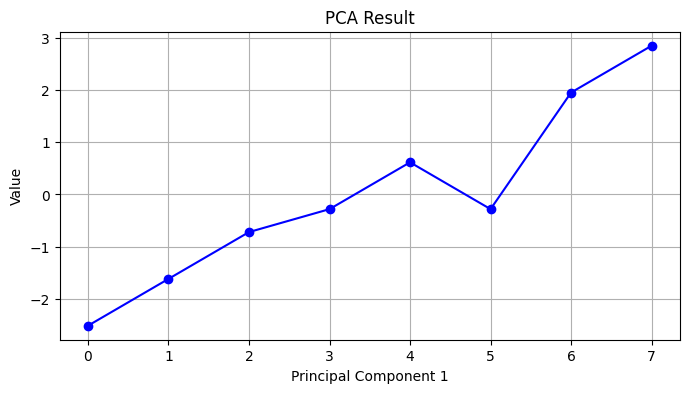

In [88]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 정의
x = np.array([[1, 2], [2, 2], [3, 2], [3, 3], [4, 3], [3, 3], [5, 4], [6, 4]])

# PCA 객체 생성 (1차원으로 축소)
pca = PCA(n_components=1)

# PCA 적용
x_transformed = pca.fit_transform(x)

# 결과 출력
print("Transformed Data:")
print(x_transformed)

# 시각화
plt.figure(figsize=(8, 4))
plt.plot(x_transformed[:], marker='o', linestyle='-', color='b')
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Value')
plt.xticks(np.arange(len(x)))  # x축 눈금 설정
plt.grid()
plt.show()


문제 10

Transformed Data:
[[-2.70049782  0.28543774]
 [-1.892556   -0.27273997]
 [-1.08461418 -0.83091767]
 [-0.25129611  0.24789484]
 [ 0.55664571 -0.31028287]
 [ 0.16856538  1.01808176]
 [ 2.1979056   0.21035194]
 [ 3.00584742 -0.34782577]]


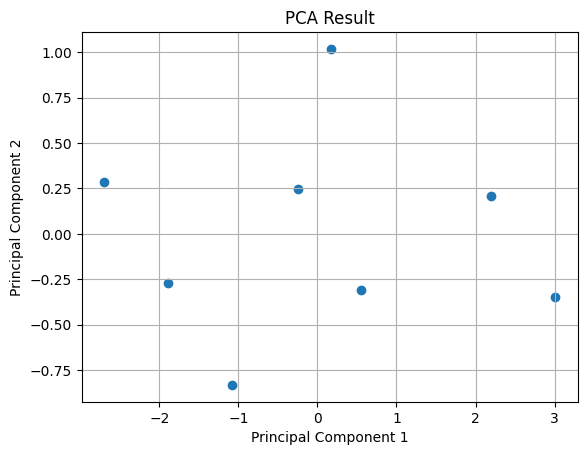

In [84]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 정의
x = np.array([
    [5, 1, 2],
    [5, 2, 2],
    [5, 3, 2],
    [4, 3, 3],
    [4, 4, 3],
    [3, 3, 3],
    [3, 5, 4],
    [3, 6, 4]])

# PCA 객체 생성 (2차원으로 축소)
pca = PCA(n_components=2)

# PCA 적용
x_transformed = pca.fit_transform(x)

# 결과 출력
print("Transformed Data:")
print(x_transformed)

# 시각화
plt.scatter(x_transformed[:, 0], x_transformed[:, 1])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()
